## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
import h5py
import numpy as np
import shutil
from ultralytics import YOLO

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
torch.cuda.is_available = lambda : False

SOURCE_DS_PATH = 'data/street_view_original'

TARGET_DS_PATH = 'datasets/yolo_street_view'

## Convert MNIST dataset into YOLO format

In [4]:
# Define paths
source_dir = "datasets/mnist/test"
dest_images = "datasets/yolo_mnist/images/val"
dest_labels = "datasets/yolo_mnist/labels/val"

# Create destination directories
os.makedirs(dest_images, exist_ok=True)
os.makedirs(dest_labels, exist_ok=True)

# YOLO format values
image_size = 28
x_center = image_size / 2 / image_size  # 14/28
y_center = image_size / 2 / image_size  # 14/28
width = image_size / image_size  # 28/28
height = image_size / image_size  # 28/28

# Process each class folder
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if not os.path.isdir(class_path):
        continue
    
    label = int(class_folder)  # Class name is the label
    for image_file in os.listdir(class_path):
        if not image_file.endswith(".png"):
            continue
        
        image_source_path = os.path.join(class_path, image_file)
        image_dest_path = os.path.join(dest_images, "val_" + image_file)
        
        # Move image
        shutil.copy(image_source_path, image_dest_path)
        
        # Create label file
        label_file = os.path.join(dest_labels, f"val_{image_file[:-3]}txt")
        with open(label_file, "w") as f:
            f.write(f"{label} {x_center} {y_center} {width} {height}\n")

print("Conversion completed.")


Conversion completed.


Model was trained using [Ultralytics hub](https://hub.ultralytics.com/)

Here we load trained model and run some predictions

In [2]:
model = YOLO("svhn.pt")

In [ ]:
results = model.predict(f'{TARGET_DS_PATH}/images/test/test_1.png')

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()


image 1/1 d:\projects\python\mo\datasets\yolo_street_view\images\test\test_1.png: 128x224 1 5, 100.1ms
Speed: 5.4ms preprocess, 100.1ms inference, 8.6ms postprocess per image at shape (1, 3, 128, 224)


In [ ]:
validation_results = model.val(data="yolo_street_view.yaml", imgsz=224, conf=0.25, iou=0.5)

Ultralytics 8.3.84  Python-3.9.18 torch-2.6.0+cu126 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)


val: Scanning D:\projects\python\mo\datasets\yolo_street_view\labels\test.cache... 13068 images, 0 backgrounds, 1 corrupt: 100%|██████████| 13068/13068 [00:00<?, ?it/s]

val: WARNING  D:\projects\python\mo\datasets\yolo_street_view\images\test\test_3192.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0152]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 817/817 [03:54<00:00,  3.48it/s]


                   all      13067      26030      0.882      0.805      0.867      0.456
                     0       1687       1744      0.875      0.849      0.893      0.481
                     1       4578       5099      0.858      0.771      0.825      0.365
                     2       3833       4148      0.919      0.823      0.887      0.477
                     3       2696       2882      0.884      0.756      0.841      0.453
                     4       2397       2523      0.876       0.83      0.873      0.446
                     5       2289       2383      0.898      0.808      0.875      0.475
                     6       1922       1977       0.87      0.785      0.864      0.467
                     7       1943       2019      0.891      0.828      0.885       0.46
                     8       1612       1660      0.901      0.792      0.869       0.47
                     9       1555       1595      0.848      0.807      0.861      0.468
Speed: 0.1ms preproce

Here is model trained on [Ultralytics hub](https://hub.ultralytics.com/) on MNIST dataset converted into YOLO format

Some predictions are shown below

In [5]:
# Train on mnist dataset
mnist_model = YOLO("mnist.pt")

In [8]:
# Run validation on mnist dataset
validation_results = model.val(data="mnist.yaml", imgsz=224, conf=0.25, iou=0.5)

Ultralytics 8.3.84  Python-3.9.18 torch-2.6.0+cu126 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)


val: Scanning D:\projects\python\mo\datasets\mnist\labels\val... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:20<00:00, 494.82it/s]


val: New cache created: D:\projects\python\mo\datasets\mnist\labels\val.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [02:34<00:00,  4.05it/s]


                   all      10000      10000          0          0          0          0
                     0        980        980          0          0          0          0
                     1       1135       1135          0          0          0          0
                     2       1032       1032          0          0          0          0
                     3       1010       1010          0          0          0          0
                     4        982        982          0          0          0          0
                     5        892        892          0          0          0          0
                     6        958        958          0          0          0          0
                     7       1028       1028          0          0          0          0
                     8        974        974          0          0          0          0
                     9       1009       1009          0          0          0          0
Speed: 0.3ms preproce

In [10]:
# Run validatin on svhn dataset
validation_results = model.val(data="mnist.yaml", imgsz=224, conf=0.25, iou=0.5)

Ultralytics 8.3.84  Python-3.9.18 torch-2.6.0+cu126 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)


val: Scanning D:\projects\python\mo\datasets\mnist\labels\val.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 625/625 [02:26<00:00,  4.27it/s]


                   all      10000      10000          0          0          0          0
                     0        980        980          0          0          0          0
                     1       1135       1135          0          0          0          0
                     2       1032       1032          0          0          0          0
                     3       1010       1010          0          0          0          0
                     4        982        982          0          0          0          0
                     5        892        892          0          0          0          0
                     6        958        958          0          0          0          0
                     7       1028       1028          0          0          0          0
                     8        974        974          0          0          0          0
                     9       1009       1009          0          0          0          0
Speed: 0.3ms preproce

## Convert SVHN dataset into YOLO format

In [23]:
def convert_ds_to_yolo(name):
    mat_file_path = f'{SOURCE_DS_PATH}/{name}/digitStruct.mat'
    source_image_folder = f'{SOURCE_DS_PATH}/{name}/'

    # Open the .mat file
    with h5py.File(mat_file_path, 'r') as file:
        digit_struct = file['digitStruct']
        count = digit_struct['bbox'].shape[0]

        def get_bbox(index):
            """ Extracts bounding box details for a given image index. """
            bbox_ref = digit_struct['bbox'][index][0]
            bbox_data = file[bbox_ref]

            def extract_values(ref):
                """ Extracts bbox attribute values (handling MATLAB's nested structures). """
                if ref.shape[0] == 1:
                    return [ref[0][0]]
                return [file[val_ref[0]][0][0] for val_ref in ref]

            bbox = {
                'label': extract_values(bbox_data['label']),
                'left': extract_values(bbox_data['left']),
                'top': extract_values(bbox_data['top']),
                'width': extract_values(bbox_data['width']),
                'height': extract_values(bbox_data['height']),
            }
            return bbox

        def get_image_name(index):
            """ Extracts the image filename for a given index. """
            name_ref = digit_struct['name'][index][0]
            return ''.join([chr(file[name_ref][i][0]) for i in range(file[name_ref].shape[0])])

        def convert_to_yolo(bboxes, w, h):
            result = ''
            for i in range(len(bboxes['label'])):
                label = bboxes['label'][i] if bboxes['label'][i] != 10 else 0
                x_center = (bboxes['left'][i] + bboxes['width'][i] / 2) / w
                y_center = (bboxes['top'][i] + bboxes['height'][i] / 2) / h
                width = bboxes['width'][i] / w
                height = bboxes['height'][i] / h
                result += f"{label} {x_center} {y_center} {width} {height}\n"
            return result

        dest_images_dir = f'{TARGET_DS_PATH}/images/{name}'
        dest_labels_dir = f'{TARGET_DS_PATH}/labels/{name}'

        def convert_to_yolo_format(n):
            for i in range(n):
                image_name = get_image_name(i)
                image_path = os.path.join(source_image_folder, image_name)
                bbox = get_bbox(i)

                img = Image.open(image_path)

                yolo_txt = convert_to_yolo(bbox, img.width, img.height)

                os.makedirs(dest_images_dir, exist_ok=True)
                os.makedirs(dest_labels_dir, exist_ok=True)

                dest_image_path = os.path.join(dest_images_dir, f"{name}_{image_name}")
                shutil.copy(image_path, dest_image_path)

                dest_label_path = os.path.join(dest_labels_dir, f"{name}_{image_name[:-3]}txt")
                with open(dest_label_path, 'w') as label_file:
                    label_file.write(yolo_txt)

        convert_to_yolo_format(count)

In [ ]:
convert_ds_to_yolo('train')

In [24]:
convert_ds_to_yolo('test')

There is no validation folder in SVHN dataset, so split train into train and validation

In [ ]:
import random

# Split some data from train into val
def split_dataset(path, factor):
    train_path_images = os.path.join(path, 'images/train')
    val_path_images = os.path.join(path, 'images/val')
    train_path_labels = os.path.join(path, 'labels/train')
    val_path_labels = os.path.join(path, 'labels/val')

    for entry in os.listdir(train_path_images):
        full_path = os.path.join(train_path_images, entry)
        
        # Check if it is a file
        if not os.path.isfile(full_path):
            continue

        rand = random.uniform(0, 1)
        if rand <= factor:
            dest_image_path = os.path.join(val_path_images, entry)
            shutil.move(full_path, dest_image_path)

            label_name = entry[:-3] + 'txt'
            source_label_path = os.path.join(train_path_labels, label_name)
            dest_label_path = os.path.join(val_path_labels, label_name)
            shutil.move(source_label_path, dest_label_path)

split_dataset(TARGET_DS_PATH, 0.2)


Display SVHN dataset

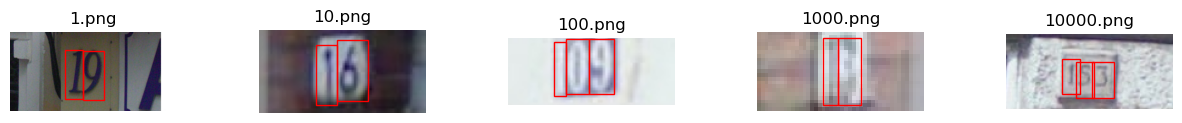

In [47]:
def display_ds(name, n):
    def get_bbox(filename):
        bbox_maps = []

        with open(filename, 'r') as file:
            for line in file:
                components = list(map(float, line.strip().split()))
                
                if len(components) == 5:
                    label, x_center, y_center, width, height = components
                    
                    bbox_map = {
                        'label': label,
                        'x_center': x_center,
                        'y_center': y_center,
                        'width': width,
                        'height': height
                    }
                    
                    bbox_maps.append(bbox_map)

        return bbox_maps

    images_dir = f'{TARGET_DS_PATH}/images/{name}'
    labels_dir = f'{TARGET_DS_PATH}/labels/{name}'

    # Create a figure for plotting
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.5)

    # Iterate through files in the images directory
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.png')][:n]

    for ax, image_name in zip(axes, image_files):
        image_path = os.path.join(images_dir, image_name)
        label_path = os.path.join(labels_dir, image_name[:-4] + '.txt')
        bbox = get_bbox(label_path)  # Extract bbox for this image

        # Load the image
        img = Image.open(image_path)

        # Display the image on the subplot
        ax.imshow(img)
        ax.axis('off')  # Turn off axis

        # Draw bounding boxes
        for box in bbox:
            width = box['width'] * img.width
            height = box['height'] * img.height
            x_center = box['x_center'] * img.width
            y_center = box['y_center'] * img.height

            # Calculate top-left corner of the bounding box
            x1 = x_center - width / 2
            y1 = y_center - height / 2

            # Create a rectangle for the bounding box
            rect = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        ax.set_title(image_name)

    # Show the plot
    plt.show()

# Example usage
display_ds('train', 5)

Display Format 2 of SVHN dataset

X shape:  (32, 32, 3, 73257)
Y shape:  (73257, 1)
X shape:  (73257, 32, 32, 3)
Y shape:  [0 8 1 ... 0 5 8]
Count:  (73257, 1)
Shape:  (1,)
Shape:  [1]


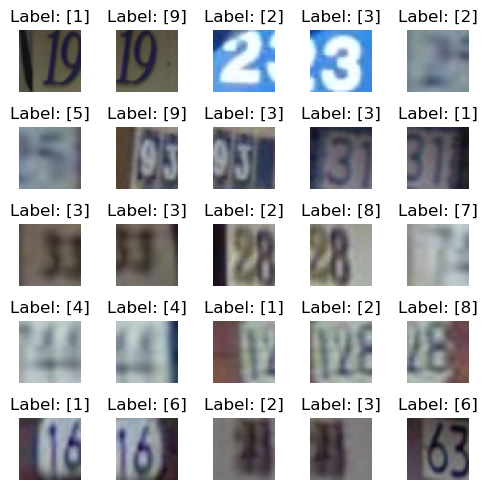

In [ ]:
# Display Format 2
# Load the .mat file
mat_data = scipy.io.loadmat('data/street_view_mat/train_32x32.mat')

# Print the keys in the loaded data
print('X shape: ', mat_data['X'].shape)
print('Y shape: ', mat_data['y'].shape)
print('X shape: ', np.moveaxis(mat_data['X'], -1, 0).shape)
print('Y shape: ', mat_data['y'].flatten() - 1)

print('Count: ', mat_data['y'].shape)
print('Shape: ', mat_data['y'][0].shape)
print('Shape: ', mat_data['y'][0])

# Display the images in the first batch
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(mat_data['X'][:, :, :, i].squeeze())
    plt.title(f"Label: {mat_data['y'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()